In [1]:
import tensorflow as tf
from tensorflow import keras  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from tqdm import tqdm #Tqdm 是一个快速，可扩展的Python进度条，可以在 Python 长循环中添加一个进度提示信息
from tensorflow.keras.preprocessing import image


##  Prepare data

In [2]:
data = pd.read_csv('Movies-Poster_Dataset-master/train.csv')
data.shape

(7254, 27)

In [3]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
img_width = 350
img_height = 350
X=[]
for i in range(data.shape[0]):
    path = 'C:/workspaceWin/DataScience/learnTensorflow/Movies-Poster_Dataset-master/Images/'+data['Id'][i]+'.jpg'
    img = image.load_img(path, target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)
X = np.array(X)

In [5]:
X.shape

(7254, 350, 350, 3)

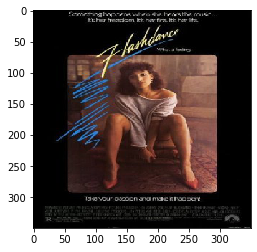

In [6]:
plt.imshow(X[1])

In [7]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [8]:
y = data.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.150,random_state=0)

## Build CNN

In [10]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))  #25 genres, for each use sigmoid

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))
#not overfitting, a bit underfitting

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
6165/6165 [==============================] - 85s 14ms/sample - loss: 0.6980 - acc: 0.6478 - val_loss: 0.2985 - val_acc: 0.8880
Epoch 2/5
6165/6165 [==============================] - 37s 6ms/sample - loss: 0.3105 - acc: 0.8926 - val_loss: 0.2628 - val_acc: 0.9066
Epoch 3/5
6165/6165 [==============================] - 31s 5ms/sample - loss: 0.2632 - acc: 0.9067 - val_loss: 0.2479 - val_acc: 0.9110
Epoch 4/5
6165/6165 [==============================] - 30s 5ms/sample - loss: 0.2561 - acc: 0.9085 - val_loss: 0.2400 - val_acc: 0.9106
Epoch 5/5
6165/6165 [==============================] - 30s 5ms/sample - loss: 0.2499 - acc: 0.9103 - val_loss: 0.2390 - val_acc: 0.9095


## Evaluation

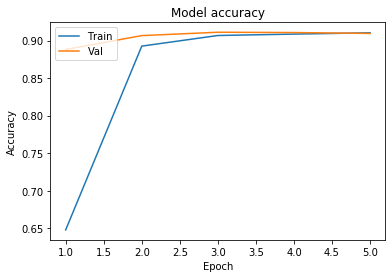

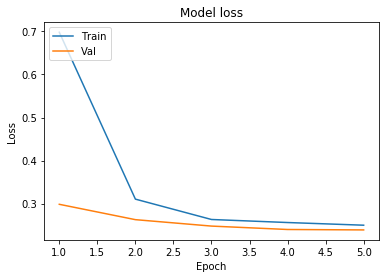

In [14]:
epoch_range=range(1,5+1)
plt.plot(epoch_range,history.history['acc'])
plt.plot(epoch_range,history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

## Test

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Romance


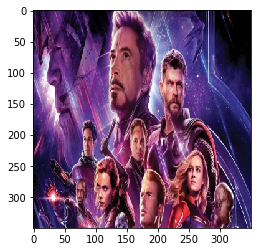

In [15]:
img = image.load_img('Movies-Poster_Dataset-master/endgame.jpg', target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,img_width,img_height,3)
classes=data.columns[2:]
print(classes)
y_prob=model.predict(img)
top3=np.argsort(y_prob[0])[:-4:-1]
for i in range(3):
    print(classes[top3[i]])

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Action


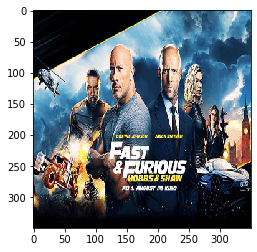

In [16]:
img = image.load_img('Movies-Poster_Dataset-master/fast.jpg', target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,img_width,img_height,3)
classes=data.columns[2:]
print(classes)
y_prob=model.predict(img)
top3=np.argsort(y_prob[0])[:-4:-1]
for i in range(3):
    print(classes[top3[i]])

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Action


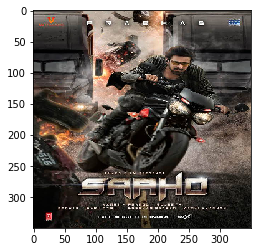

In [17]:
img = image.load_img('Movies-Poster_Dataset-master/saaho.jpg', target_size=(img_width,img_height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,img_width,img_height,3)
classes=data.columns[2:]
print(classes)
y_prob=model.predict(img)
top3=np.argsort(y_prob[0])[:-4:-1]
for i in range(3):
    print(classes[top3[i]])